In [59]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
ds = pd.read_csv("D:\Downloads\IMDbMoviesIndia.csv", encoding='latin1')

In [34]:
ds.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [35]:
ds.shape

(15509, 10)

In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [37]:
ds.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [38]:
ds.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [40]:
ds.dropna(inplace=True)

In [41]:
ds.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [42]:
ds.shape #the dataset reduced from (15509, 10)

(5659, 10)

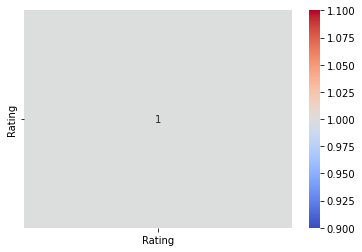

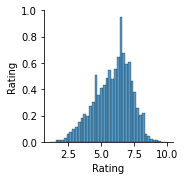

In [52]:
sns.heatmap(ds.corr(), annot=True, cmap='coolwarm')
plt.show()

In [61]:
# Convert 'Year' column to numeric
ds['Year'] = pd.to_numeric(ds['Year'].str.extract('(\d{4})')[0], errors='coerce')

# Convert 'Duration' column to numeric
ds['Duration'] = pd.to_numeric(ds['Duration'].str.extract('(\d+)')[0], errors='coerce')

# Clean the 'Votes' column
ds['Votes'] = pd.to_numeric(ds['Votes'].str.replace(',', ''), errors='coerce')

# Drop rows where 'Rating' is NaN
ds = ds.dropna(subset=['Rating'])

# Fill missing values for other numeric columns with median
ds['Year'].fillna(ds['Year'].median(), inplace=True)
ds['Duration'].fillna(ds['Duration'].median(), inplace=True)
ds['Votes'].fillna(ds['Votes'].median(), inplace=True)

# Drop unnecessary columns
ds = ds.drop(columns=['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

# Define features (X) and target (y)
X = ds[['Year', 'Duration', 'Votes']]
y = ds['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 1.7073310281488043
R-squared: 0.0779873705974875
Coefficients: [-1.87025270e-02 -6.14482448e-03  1.82846799e-05]
Intercept: 43.997739488576585
